This notebook is for gathering data on sunset times at two different locations and representing those data graphically.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import data from csv files and view it.

In [3]:
fwdata = pd.read_csv('data/fw-data.csv')
print(fwdata)

       2022 sunrise time   Zenith FW Sunset Day length  \
0    01-Jan      9:58 AM  1:25 PM   4:51 PM   06:52:56   
1    02-Jan      9:58 AM  1:25 PM   4:52 PM   06:54:29   
2    03-Jan      9:57 AM  1:26 PM   4:54 PM   06:56:11   
3    04-Jan      9:57 AM  1:26 PM   4:55 PM   06:58:01   
4    05-Jan      9:56 AM  1:26 PM   4:56 PM   06:59:58   
..      ...          ...      ...       ...        ...   
360  27-Dec      9:59 AM  1:22 PM   4:46 PM   06:46:58   
361  28-Dec      9:59 AM  1:23 PM   4:47 PM   06:47:48   
362  29-Dec      9:59 AM  1:23 PM   4:47 PM   06:48:47   
363  30-Dec      9:59 AM  1:24 PM   4:49 PM   06:49:54   
364  31-Dec      9:58 AM  1:24 PM   4:50 PM   06:51:09   

    Astronomical twilight start Nautical twilight start Civil twilight start  \
0                         +1:26                 7:33 AM              8:19 AM   
1                         +1:33                 7:33 AM              8:19 AM   
2                         +1:42                 7:33 AM        

In [4]:
cfdata = pd.read_csv('data/cf-data.csv')
print(cfdata)

       2022 sunrise time   Zenith CF Sunset Day length  \
0    01-Jan      9:19 AM  1:17 PM   5:15 PM   07:55:17   
1    02-Jan      9:19 AM  1:17 PM   5:16 PM   07:56:28   
2    03-Jan      9:19 AM  1:18 PM   5:17 PM   07:57:44   
3    04-Jan      9:19 AM  1:18 PM   5:18 PM   07:59:06   
4    05-Jan      9:18 AM  1:19 PM   5:19 PM   08:00:34   
..      ...          ...      ...       ...        ...   
360  27-Dec      9:19 AM  1:14 PM   5:10 PM   07:50:51   
361  28-Dec      9:19 AM  1:15 PM   5:11 PM   07:51:28   
362  29-Dec      9:19 AM  1:15 PM   5:12 PM   07:52:12   
363  30-Dec      9:19 AM  1:16 PM   5:12 PM   07:53:01   
364  31-Dec      9:19 AM  1:16 PM   5:13 PM   07:53:58   

    Astronomical twilight start Nautical twilight start Civil twilight start  \
0                         +1:03                 7:16 AM              7:56 AM   
1                         +1:11                 7:16 AM              7:56 AM   
2                         +1:16                 7:16 AM        

print list of columns in dataframes.

In [5]:
print(list(fwdata))
print(list(cfdata))

['2022', 'sunrise time', 'Zenith', 'FW Sunset', 'Day length', 'Astronomical twilight start', 'Nautical twilight start', 'Civil twilight start', 'Civil twilight end', 'Nautical twilight end', 'Astronomical twilight end', 'Unnamed: 11']
['2022', 'sunrise time', 'Zenith', 'CF Sunset', 'Day length', 'Astronomical twilight start', 'Nautical twilight start', 'Civil twilight start', 'Civil twilight end', 'Nautical twilight end', 'Astronomical twilight end', 'Unnamed: 11']


Remove extraneous columns from dataframes.

In [6]:
fwdata.drop(["sunrise time", "Zenith", "Day length", "Astronomical twilight start", "Nautical twilight start", 'Civil twilight start', 'Civil twilight end', 'Nautical twilight end', 'Astronomical twilight end', 'Unnamed: 11'], axis = 1, inplace = True)
print(list(fwdata))
cfdata.drop(["sunrise time", "Zenith", "Day length", "Astronomical twilight start", "Nautical twilight start", 'Civil twilight start', 'Civil twilight end', 'Nautical twilight end', 'Astronomical twilight end', 'Unnamed: 11'], axis = 1, inplace = True)
print(list(cfdata))

['2022', 'FW Sunset']
['2022', 'CF Sunset']


merge dataframes

In [7]:
sunsetdata = pd.merge(fwdata, cfdata)
sunsetdata

,2022,FW Sunset,CF Sunset
0,01-Jan,4:51 PM,5:15 PM
1,02-Jan,4:52 PM,5:16 PM
2,03-Jan,4:54 PM,5:17 PM
3,04-Jan,4:55 PM,5:18 PM
4,05-Jan,4:56 PM,5:19 PM
...,...,...,...
360,27-Dec,4:46 PM,5:10 PM
361,28-Dec,4:47 PM,5:11 PM
362,29-Dec,4:47 PM,5:12 PM
363,30-Dec,4:49 PM,5:12 PM


convert all columns to datetime

In [8]:
sunsetdata['2022'] = pd.to_datetime(sunsetdata['2022'], format='%d-%b')
sunsetdata['FW Sunset'] = pd.to_datetime(sunsetdata['FW Sunset'], format='%I:%M %p')
sunsetdata['CF Sunset'] = pd.to_datetime(sunsetdata['CF Sunset'], format='%I:%M %p')

sunsetdata.dtypes

2022         datetime64[ns]
FW Sunset    datetime64[ns]
CF Sunset    datetime64[ns]
dtype: object

In [9]:
sunsetdata

,2022,FW Sunset,CF Sunset
0,1900-01-01,1900-01-01 16:51:00,1900-01-01 17:15:00
1,1900-01-02,1900-01-01 16:52:00,1900-01-01 17:16:00
2,1900-01-03,1900-01-01 16:54:00,1900-01-01 17:17:00
3,1900-01-04,1900-01-01 16:55:00,1900-01-01 17:18:00
4,1900-01-05,1900-01-01 16:56:00,1900-01-01 17:19:00
...,...,...,...
360,1900-12-27,1900-01-01 16:46:00,1900-01-01 17:10:00
361,1900-12-28,1900-01-01 16:47:00,1900-01-01 17:11:00
362,1900-12-29,1900-01-01 16:47:00,1900-01-01 17:12:00
363,1900-12-30,1900-01-01 16:49:00,1900-01-01 17:12:00


plot data

In [10]:
#sunsetdata.plot(x = '2022', y = ['FW Sunset', 'CF Sunset'])
#plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

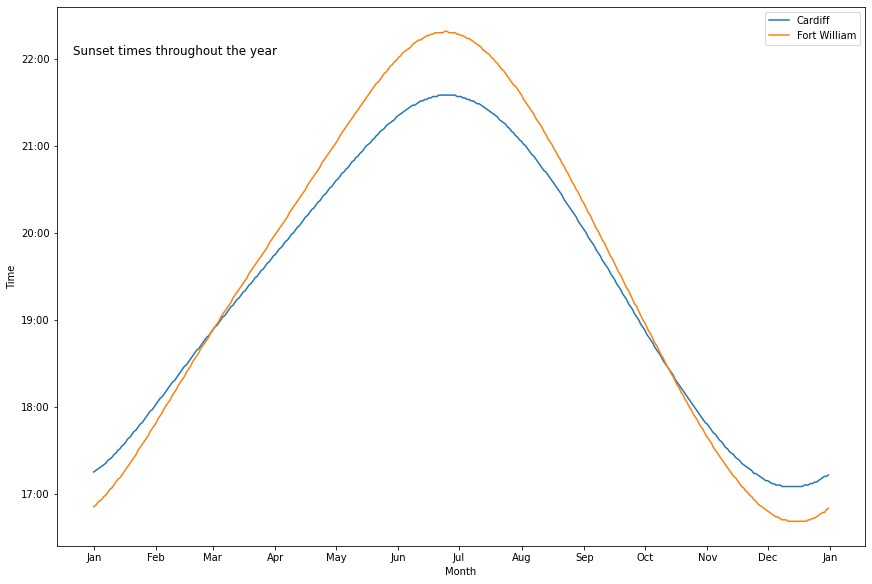

In [35]:
#define axis

x = sunsetdata['2022']
y = sunsetdata['CF Sunset']
y2 = sunsetdata['FW Sunset']

#create figure

fig, ax = plt.subplots(figsize=(12, 8), layout='constrained')

#add data to axes

ax.plot(x, y, label='Cardiff')
ax.plot(x, y2, label='Fort William')

#make tick marks each month and set them to month format on x-axis

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#do y-axis

#ax.yaxis.set_major_locator(mdates.MINUTELY())
ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

#add axis lables

ax.set_xlabel('Month')
ax.set_ylabel('Time')

#add a legend

ax.legend()

#add a title

ax.set_title('Sunset times throughout the year', loc='left', y=0.9, x=0.02, fontsize='large')

plt.show

https://matplotlib.org/stable/tutorials/introductory/quick_start.html
https://matplotlib.org/stable/users/getting_started/index.html
https://matplotlib.org/
https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html